In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# A Simple Starter Code for the AJL Competition

@Cindy Deng

---


Hi! This starter code is designed to help you get familiar with basic Kaggle operations and guide you through the basic workflow of a machine learning project. 

The code outlines essential steps including data loading, preprocessing, model building, training, and generating predictions. Each section serves as a foundation, but there are many ways to enhance each step to improve your final model's accuracy. Feel free to experiment with different data augmentation techniques, model architectures, and tuning methods to optimize your final results! Some amazing tutorials are available through your AI Studio course in Canvas / in the 'Resource' section of this Kaggle competition.

Good luck and have fun!

---

## Note - About file path

You could use the cell above to print the names of the file directories and get the following directories:

```
/kaggle/input/bttai-ajl-2025/sample_submission.csv
/kaggle/input/bttai-ajl-2025/train.csv
/kaggle/input/bttai-ajl-2025/test.csv
/kaggle/input/bttai-ajl-2025/test/test/e0374ae6c1362ff183cfba28ded5421b.jpg
/kaggle/input/bttai-ajl-2025/test/test/437159c605260bdd079af230566af291.jpg
...
...
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/11271bdf2598afdd4260db3125e1f6a5.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/732819951dcf2b53d15ea7b8bb123b71.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/6dcc7a8abb5e1c6e670101f4b6231246.jpg
/kaggle/input/bttai-ajl-2025/train/train/dermatomyositis/e63c3b3f0ab8905e204fe467cc7411f9.jpg
...
...
```



## 1. Import Necessary Libraries

In [2]:
# 1. Import Necessary Libraries
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Explanation:
# - pandas and numpy: for data manipulation
# - sklearn: for splitting data and encoding labels
# - tensorflow.keras: for building and training the neural network

## 2. Load Data

Make sure to verify the file paths if you're running on a different platform.

In [3]:
# 2. Load Data
train_df = pd.read_csv('/kaggle/input/bttai-ajl-2025/train.csv')
test_df = pd.read_csv('/kaggle/input/bttai-ajl-2025/test.csv')

# Add .jpg extension to md5hash column to reference the file_name
train_df['md5hash'] = train_df['md5hash'].astype(str) + '.jpg'
test_df['md5hash'] = test_df['md5hash'].astype(str) + '.jpg'

# Combine label and md5hash to form the  correct path
train_df['file_path'] = train_df['label'] + '/' + train_df['md5hash']

In [4]:
# Check the first few rows to understand the structure
print(train_df.head())

                                md5hash  fitzpatrick_scale  \
0  fd06d13de341cc75ad679916c5d7e6a6.jpg                  4   
1  a4bb4e5206c4e89a303f470576fc5253.jpg                  1   
2  c94ce27e389f96bda998e7c3fa5c4a2e.jpg                  5   
3  ebcf2b50dd943c700d4e2b586fcd4425.jpg                  3   
4  c77d6c895f05fea73a8f3704307036c0.jpg                  1   

   fitzpatrick_centaur                             label nine_partition_label  \
0                    4                 prurigo-nodularis     benign-epidermal   
1                    1  basal-cell-carcinoma-morpheiform  malignant-epidermal   
2                    5                            keloid         inflammatory   
3                    3              basal-cell-carcinoma  malignant-epidermal   
4                    1                 prurigo-nodularis     benign-epidermal   

  three_partition_label            qc  ddi_scale  \
0                benign           NaN         34   
1             malignant           Na

## 3. Data Preprocessing


This section demonstrates basic preprocessing techniques. To enhance data quality and model performance, consider incorporating more advanced preprocessing methods.

For further guidance, feel free to take a look at the [Image Preprocessing tutorial](https://colab.research.google.com/drive/1-ItNcRMbZBE6BCwPT-wD8m3YmHqwHxme?usp=sharing)  available in the 'Resources' section of this Kaggle competition.


In [5]:
# 3. Data Preprocessing
# Encode the labels -- translating diagnoses to numbers
label_encoder = LabelEncoder()
train_df['encoded_label'] = label_encoder.fit_transform(train_df['label'])

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# # Define image data generators for training and validation
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# Define the directory paths
train_dir = '/kaggle/input/bttai-ajl-2025/train/train/'

In [6]:
# Starting off by feeding these images directly into a basic model -- will add preprocessing later on

# FRom image processing colab

# Necessary Imports
import os
import numpy as np
import pandas as pd
from collections import Counter
import keras
from keras import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout, Input
from keras.optimizers import Adam
from PIL import Image
from tensorflow import data as tf_data
import matplotlib.pyplot as plt
from keras.preprocessing import image
import tensorflow as df

from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [7]:
###### METHODS FOR EACH AUGMENTATION

from PIL import Image, ImageEnhance, ImageFilter

def rotate(filepath):
    with Image.open(filepath) as img:
        # print("Original Image: ")
        # display(img)
        
        rotated = img.rotate(45)
        # print("Rotated 45 degrees")
        # display(rotated)

    return rotated  

def flip_upside_down(filename):
    with Image.open(filename) as img:
        upside = img.transpose(Image.FLIP_TOP_BOTTOM)
    return upside


In [8]:
import numpy as np
import os
import pandas as pd
import shutil
import random

from shutil import unpack_archive
from subprocess import check_output

## Introducing sampling methods to ensure that our dataset is proportional
def numImages(base_dir):

    all_nums = []
    # Iterate through each subdirectory ('class_dir') in the base directory ('base_dir')
    for class_dir in tqdm(os.listdir(base_dir), desc="Processing classes"):
        class_path = os.path.join(base_dir, class_dir)

        # Get all filenames in the current class directory
        filenames = os.listdir(class_path)
        all_nums.append(len(filenames))
        print("class: ", class_dir, " number: ", len(filenames))

    print("Average number: ", sum(all_nums)/len(all_nums))

    return all_nums


def downsample(base_dir, sample_size_per_class, new_dir):
    """
    Draws a uniform sample of filenames from directories, where each directory represents a class.
    Copies sampled files into new_dir in the same class-based format as original
    
    Parameters:
        base_dir (str): The path to the base directory containing subdirectories.
        sample_size_per_class (int): The number of filenames to sample from each class directory.

    Returns:
        dict: A dictionary with class labels (directory names) as keys and lists of sampled filenames as values.
    """
    # Dictionary to store sampled filenames for each class
    sampled_files = {}
    new_path = "./" + new_dir

    # making new directory for sampled files
    if not os.path.exists(new_path):
        shutil.os.mkdir(new_path)

    # Iterate through each subdirectory ('class_dir') in the base directory ('base_dir')
    for class_dir in tqdm(os.listdir(base_dir), desc="Processing classes"):
        class_path = os.path.join(base_dir, class_dir)

        # Get all filenames in the current class directory
        filenames = os.listdir(class_path)

        # Check if there are enough files to sample from
        if len(filenames) < sample_size_per_class:
            print(f"Warning: Not enough files in class '{class_dir}' to sample {sample_size_per_class}. Using all available files.")
            sampled_files[class_dir] = filenames
        else:
            # Randomly sample files from the current class directory
            sampled_files[class_dir] = random.sample(filenames, sample_size_per_class)

        #########
        # moving files into the new training folder named after the class label
        if not os.path.exists(new_path + "/" + class_dir):
            shutil.os.mkdir(new_path + "/" + class_dir)
        for file in sampled_files[class_dir]:
            if not os.path.exists(new_path + "/" + class_dir + "/" + file):
                shutil.copy2(class_path + "/" + file, new_path + "/" + class_dir)

    return sampled_files

def upsample(base_dir, samp_size, new_dir):
    """
    Upsamples by identifying the number of additional images needed in each class 
    and randomly generating augmented images to fill this gap.
    Also copies the new files into new_dir in the same class-folder format. 
    
    Parameters:
        base_dir (str): The path to the base directory containing subdirectories.
        samp_size (int): The number of filenames to sample from each class directory.

    Returns: nothing
    
    """
    new_path = "./" + new_dir

    # making new directory for sampled files
    if not os.path.exists(new_path):
        shutil.os.mkdir(new_path)
        
    # Iterate through each subdirectory ('class_dir') in the base directory ('base_dir')
    for class_dir in tqdm(os.listdir(base_dir), desc="Processing classes"):
        class_path = os.path.join(base_dir, class_dir)

        # making class directory in new dataset if needed
        if not os.path.exists(new_path + "/" + class_dir):
            shutil.os.mkdir(new_path + "/" + class_dir)

        # Get all filenames in the current class directory
        filenames = os.listdir(class_path)
        all_files = [] # this will be the list of files to save to the new directory

        # Check if there are enough files to sample from
        if len(filenames) < samp_size:
            # generate additional images and add them to the new folder
            needed = samp_size - len(filenames)
            new_imgs = genAugmentation(class_path, needed, new_path + "/" + class_dir)
            
        # add all original files to the new folder
        # moving files into the new training folder named after the class label

        for file in filenames:
            if not os.path.exists(new_path + "/" + class_dir + "/" + file):
                shutil.copy2(class_path + "/" + file, new_path + "/" + class_dir)

""""
Selects samp_size files randomly from filenames, checking to make sure none
are already augmented (e.g. have "-r" in the filename)

NOTE: if there are not enough non-augmented images in the folder, returns
only as many images as can be augmented

filenames: list of names in the form <hash>.jpg
samp_size: int num of how many files from filenames to return
filter: whether to remove previously augmented files from sample

returns a list of filenames selected for augmentation
"""
def sample(filenames, samp_size, filter=True):
    
    if not filter:
        return random.sample(filenames, samp_size)

    to_aug = []
    inds_seen = set() # tracker for indexes of images iterated through

    # continuing to look until we either have enough images are have run out of images to select
    while len(to_aug) < samp_size and len(inds_seen) != len(filenames):
        ind = random.randint(0, len(filenames) - 1)
        if ind not in inds_seen:
            inds_seen.add(ind)
            if "-r" not in filenames[ind]:
                to_aug.append(filenames[ind])

    if len(to_aug) != samp_size:
        print("Did not find enough non-augmented images. Total number sampled: ", len(to_aug), ". Total number needed: ", samp_size)
    return to_aug
        
def genAugmentation(class_path, needed, new_path):
    """
    generates needed number of images by randomly selecting images from a folder and
    performing an augmentation. Saves images to new_path folder.
    
    Parameters:
        class_path (string): The path to a directory of images
        needed (int): The number of additional files to be augmented
        new_path (string): new place where the images will be saved

    Returns:
        new_files: A list of the newly-generated augmented filenames
    """
    # get all original images in the directory
    filenames = os.listdir(class_path)

    # randomly selecting which images to augment
    to_aug = sample(filenames, needed, filter=False)

    # list of new filepaths
    new_files = []

    # performing a 45-degree angle rotation
    for img in to_aug:
        imgpath = class_path + "/" + img
        #new_img = rotate(imgpath)
        new_img = flip_upside_down(imgpath)
        new_img.save(os.path.join(new_path, f"{img}-r.jpg")) # '-r' for rotated
        new_files.append(f"{img}-r.jpg")

    return new_files

In [9]:
### setting up upsampling by skin color/fitz

import re

""" 
returns a list of count by fitz score for each category. 
base_dir = train_dir or equiv
this is done like this and not with the df because of the case where
we add new data to the directory (augmented -r files) that won't be in the CSV
"""
def count_by_diag(base_dir, train_df):
    for diag_dir in os.listdir(base_dir):
        fitz_count = [0 for i in range(7)]
        dir_path = os.path.join(base_dir, diag_dir)
        for img in os.listdir(dir_path):
            # get hash only to check fitz score
            """
            - get hash
            - check fitz of row in df with this hash
            - increment corresponding fitz_count
            """
            # print(train_df[train_df['md5hash'] == img])
            
            # accounting for augmented images, which ahve the same score as their original version
            if "-r" in img:
                img = re.sub("-r", "", img)
                # img = re.sub(".jpg.jpg", ".jpg", img) #fixing a typo in earlier syntax
                
            fitz = train_df[train_df["md5hash"] == img]["fitzpatrick_scale"].iloc[0]
            # print(fitz)
            if fitz != -1:
                fitz_count[fitz] += 1

        print(diag_dir, ": ", fitz_count)
    

"""
Plan:

By fitz only: 
- identify number of images in each category
- identify ideal sample 
- randomly select that number of images to augment and add to the new dataset

By fitz AND diagnosis:
- also identify goal number for total category samples
- increase this to the goal but shifting within fitz scores these categories (e.g. if you have 20/80 for 50 images
you'd want to generate more to have 50/50 of 80 or something like that)


New idea:
- first upsample all categories based on fitz score
- THEN randomly upsample from that to even out categories overall

NOTES:
- might be relatively easy to first select non-augmented images for the second round of 
upsampling by diagnosis, just so we don't end up with 3 copies of the same image
"""

def fitz_diagnosis_upsample(base_dir, new_dir, train_df):

    # # identify goal number of images per diagnosis (min * 2 for now)
    # per_diag = min(numImages(base_dir)) * 2

    """
    for each category:
    - find largest fitz cat and mult by 6 to get total number desired
    - randomly select X number of images in each category and add all md5hashes to a list
    - collect this list over all categories, then after doing so do all of the augmentations on this list

    - THEN do the regular by-category upsampling 

    """
    # list of string diags to use in filepath later
    ordered_cats = train_df["label"].unique()
    ordered_cats.sort()

    new_files = [] # list of all images augmented

    # making new_path directory in new dataset if needed
    if not os.path.exists(new_dir):
        shutil.os.mkdir(new_dir)
   
    for cat in range(21):

        # making class directory in new dataset if needed
        if not os.path.exists(new_dir + "/" + ordered_cats[cat]):
            shutil.os.mkdir(new_dir + "/" + ordered_cats[cat])
            
        to_augment = [] # list of md5hash keys to augment
        most_common = max((train_df[train_df["encoded_label"] == cat])['fitzpatrick_scale'].value_counts(normalize=False))
        goal_total = most_common * 6

        for i in range(1, 7): #iterating through fitz scores
            this_fitz = train_df[(train_df["encoded_label"]== cat) & (train_df["fitzpatrick_scale"]==i)]
            # print(this_fitz.head)
            if len(this_fitz) == 0:
                print("Category " + ordered_cats[cat] + " has no images for fitz " + str(i))
                continue
            to_select = most_common - len(this_fitz)
            if to_select == 0:
                continue
            if len(this_fitz) < to_select:
                to_select = len(this_fitz) # just doing this to avoid the doubling issue, can fix this later
            # now randomly select to_select codes from the train df and add them to to_augment
            to_augment.extend(random.sample(this_fitz["md5hash"].to_list(), to_select))
            # this_fitz["md5hash"].to_list().sample(to_select)
            

        # now have to_augment, a list of md5hash values to augment in this category
        folder = base_dir + "/" + ordered_cats[cat] + "/"
        for img in to_augment:
            filepath = folder + img
            destination_dir = new_dir +  "/" + ordered_cats[cat]
            new_img = rotate(filepath)
            md_only = re.sub(".jpg", "", img)
            new_img.save(os.path.join(destination_dir, f"{md_only}-r.jpg")) # '-r' for rotated
            new_files.append(f"{md_only}-r.jpg")

        # adding ALL original images to the new folder
        # for hsh in train_df[train_df["encoded_label"] == cat]:
        #     path = folder + img + ".jpg"
        #     path.save(os.path.join(destination_dir, f"{img}.jpg"))

        for hsh in train_df[train_df["encoded_label"] == cat]["md5hash"]:
            if not os.path.exists( new_dir + "/" + ordered_cats[cat] + "/" + hsh):
                shutil.copy2(folder + hsh, new_dir + "/" + ordered_cats[cat])
            

    

In [10]:
# # testing above methods
count_by_diag(train_dir, train_df)
fitz_diagnosis_upsample(train_dir, "./test_fitz", train_df)
print("NEW DIR: ")
count_by_diag("./test_fitz", train_df)
# shutil.rmtree("./test_fitz")

dermatomyositis :  [0, 16, 39, 24, 15, 6, 4]
malignant-melanoma :  [0, 23, 29, 10, 7, 3, 1]
basal-cell-carcinoma :  [0, 58, 114, 81, 47, 15, 5]
eczema :  [0, 18, 65, 25, 17, 8, 7]
basal-cell-carcinoma-morpheiform :  [0, 16, 21, 4, 0, 1, 0]
melanoma :  [0, 27, 55, 41, 24, 15, 7]
acne :  [0, 32, 48, 22, 15, 11, 0]
kaposi-sarcoma :  [0, 10, 18, 21, 29, 21, 8]
seborrheic-keratosis :  [0, 9, 21, 6, 4, 3, 4]
keloid :  [0, 16, 23, 17, 19, 20, 12]
acne-vulgaris :  [0, 53, 104, 34, 30, 9, 4]
squamous-cell-carcinoma :  [0, 71, 121, 86, 50, 34, 14]
epidermal-nevus :  [0, 25, 19, 7, 9, 2, 0]
pyogenic-granuloma :  [0, 25, 27, 12, 10, 3, 0]
dyshidrotic-eczema :  [0, 12, 18, 9, 8, 2, 5]
mycosis-fungoides :  [0, 26, 38, 30, 18, 9, 2]
actinic-keratosis :  [0, 21, 55, 18, 15, 8, 0]
superficial-spreading-melanoma-ssm :  [0, 35, 28, 12, 2, 2, 2]
dermatofibroma :  [0, 9, 25, 16, 4, 0, 0]
folliculitis :  [0, 20, 72, 63, 33, 22, 9]
prurigo-nodularis :  [0, 6, 24, 24, 37, 22, 5]
Category acne has no images fo

In [11]:
## getting a sense of how many images are in each category
numImages("./test_fitz")

## --> min number we can choose is 43 for basal-cell-carcinoma-morpheiform

Processing classes: 100%|██████████| 21/21 [00:00<00:00, 1495.04it/s]

class:  basal-cell-carcinoma-morpheiform  number:  53
class:  dermatomyositis  number:  162
class:  melanoma  number:  268
class:  prurigo-nodularis  number:  171
class:  pyogenic-granuloma  number:  106
class:  keloid  number:  140
class:  acne-vulgaris  number:  362
class:  squamous-cell-carcinoma  number:  590
class:  folliculitis  number:  332
class:  kaposi-sarcoma  number:  154
class:  basal-cell-carcinoma  number:  484
class:  acne  number:  192
class:  dyshidrotic-eczema  number:  88
class:  malignant-melanoma  number:  105
class:  superficial-spreading-melanoma-ssm  number:  108
class:  actinic-keratosis  number:  184
class:  mycosis-fungoides  number:  176
class:  seborrheic-keratosis  number:  74
class:  dermatofibroma  number:  77
class:  eczema  number:  218
class:  epidermal-nevus  number:  88
Average number:  196.76190476190476


[53,
 162,
 268,
 171,
 106,
 140,
 362,
 590,
 332,
 154,
 484,
 192,
 88,
 105,
 108,
 184,
 176,
 74,
 77,
 218,
 88]

In [12]:
#shutil.rmtree("./upsampled")

In [13]:
### Down and/or upsampling

# creating a new training folder with sampled images
# sample_dict = downsample(train_dir, 40)

# min number is 43, so for now bc we're only at most doubling we'll do upsampling up to 85

upsample("./test_fitz", 100, "upsampled")

Processing classes: 100%|██████████| 21/21 [00:01<00:00, 19.42it/s]


In [14]:
# SECOND ROUND OF AUGMENTATION -- can also try inc. sample size in second round

fitz_diagnosis_upsample(train_dir, "./test_fitz", train_df)
upsample("./test_fitz", 100, "upsampled")

Category acne has no images for fitz 6
Category actinic-keratosis has no images for fitz 6
Category basal-cell-carcinoma-morpheiform has no images for fitz 4
Category basal-cell-carcinoma-morpheiform has no images for fitz 6
Category dermatofibroma has no images for fitz 5
Category dermatofibroma has no images for fitz 6
Category epidermal-nevus has no images for fitz 6
Category pyogenic-granuloma has no images for fitz 6


Processing classes: 100%|██████████| 21/21 [00:00<00:00, 53.49it/s]


In [15]:
numImages("./upsampled")

Processing classes: 100%|██████████| 21/21 [00:00<00:00, 987.08it/s]

class:  basal-cell-carcinoma-morpheiform  number:  111
class:  dermatomyositis  number:  169
class:  melanoma  number:  276
class:  prurigo-nodularis  number:  187
class:  pyogenic-granuloma  number:  108
class:  keloid  number:  154
class:  acne-vulgaris  number:  364
class:  squamous-cell-carcinoma  number:  632
class:  folliculitis  number:  339
class:  kaposi-sarcoma  number:  167
class:  basal-cell-carcinoma  number:  504
class:  acne  number:  200
class:  dyshidrotic-eczema  number:  112
class:  malignant-melanoma  number:  110
class:  superficial-spreading-melanoma-ssm  number:  113
class:  actinic-keratosis  number:  184
class:  mycosis-fungoides  number:  186
class:  seborrheic-keratosis  number:  120
class:  dermatofibroma  number:  116
class:  eczema  number:  218
class:  epidermal-nevus  number:  110
Average number:  213.33333333333334


[111,
 169,
 276,
 187,
 108,
 154,
 364,
 632,
 339,
 167,
 504,
 200,
 112,
 110,
 113,
 184,
 186,
 120,
 116,
 218,
 110]

In [16]:
image_size = (180, 180)  # Target dimensions for resizing images (height, width).
batch_size = 32  # Number of images processed in a single batch during training.
# Note: A batch size of 128 (common in other setups) may exceed Colab's memory limits, causing crashes.
# The chosen batch size of 32 balances memory usage and runtime, with an estimated runtime of ~3 hours.

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "./upsampled", #train_dir,             # Path to the directory containing the dataset.
    labels="inferred", # tells model to use folder names as labels
    label_mode="int",
    validation_split=0.2,    # Specify that 20% of the dataset will be used for validation.
    subset="both",           # Create both training and validation datasets from the directory.
    seed=42,                 # Random seed to ensure reproducibility when shuffling the data.
    image_size=image_size,   # Resize all images to the specified dimensions (180x180).
    batch_size=batch_size,   # Divide the dataset into batches of the specified size (32 images per batch).
)

# train_dir = '/kaggle/input/bttai-ajl-2025/train/train/'

# /kaggle/input/bttai-ajl-2025/test/test

test_dir = "/kaggle/input/bttai-ajl-2025/test"

# print(os.listdir(test_dir))

test_dataset = keras.utils.image_dataset_from_directory(
           test_dir,
           shuffle=False,        #or False
           batch_size=batch_size,
           image_size=image_size
)

Found 4480 files belonging to 21 classes.
Using 3584 files for training.
Using 896 files for validation.
Found 1227 files belonging to 1 classes.


In [17]:
## transfer learning example

from tensorflow.keras.callbacks import EarlyStopping


# Load the pre-trained Xception model as the base model for transfer learning
base_model = keras.applications.Xception(
    weights="imagenet",  # Use weights pre-trained on the ImageNet dataset.
    input_shape=(180, 180, 3),  # Define the input shape expected by the base model (150x150 RGB images).
    include_top=False,  # Exclude the fully connected classifier layers at the top (we will add our own).
)

# Freeze the base model's layers to prevent them from being updated during training.
base_model.trainable = True

# added this to reduce the wavy training and attempt to reduce overfitting
# --> it doesn't seem to do much abt overfitting but it does improve the smoothness, which i think
# might increase the number of epochs we can run it on without getting really inconsistent performance
# 132 layers total
# print("number of layers in base model: ", len(base_model.layers))
# for layer in base_model.layers[-60:]: # Unfreeze only the last 15 layers (tried w 30 too)
#     layer.trainable = True

# Define the input for the new model
inputs = keras.Input(shape=(180, 180, 3))  # Create an input layer for images with size 150x150 and 3 color channels (RGB).

# Add a rescaling layer to preprocess the input images.
# Pre-trained Xception requires input values to be scaled from (0, 255) to (-1, 1).
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)  # Rescale pixel values to the required range.
x = scale_layer(inputs)  # Apply the rescaling transformation to the input.

# Pass the rescaled input through the base model.
# `training=False` ensures that the base model's batch normalization layers remain in inference mode,
# even if the overall model is being trained.
x = base_model(x, training=False)

# ADDED TO COMBAT OVERFITTING
# x = keras.layers.BatchNormalization()(x)

# Apply global average pooling to reduce the spatial dimensions of the feature maps.
# This aggregates the spatial information into a single vector per feature map.
x = keras.layers.GlobalAveragePooling2D()(x)

# Add a dropout layer to prevent overfitting by randomly setting 20% of the input units to zero during training.
# x = keras.layers.Dropout(0.2)(x)

# Add a dense (fully connected) output layer with 1 unit.
# This layer produces the final prediction output of the model.
#outputs = keras.layers.Dense(21)(x)

# adding regularization to see if that helps w overfitting
outputs = keras.layers.Dense(21, kernel_regularizer=keras.regularizers.l2(0.05))(x)

# Create the complete model by connecting the inputs to the outputs.
model = keras.Model(inputs, outputs)

# Display the model's architecture, including which layers are trainable and which are frozen.
model.summary(show_trainable=True)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_1 (InputLayer)          │ (None, 180, 180, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ rescaling (Rescaling)               │ (None, 180, 180, 3)          │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ xception (Functional)               │ (None, 6, 6, 2048)           │    20,861,480 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ global_average_pooling2d            │ (None, 2048)                 │             0 │    -    │
│ (GlobalAveragePooling2D)            │                              │               │         │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense (Dense)                       │ (None, 21)                   │        43,029 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 20,904,509 (79.74 MB)

 Trainable params: 20,849,981 (79.54 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

epochs = 40

# attempted addition to reduce overfitting
early_stopping = EarlyStopping(
    monitor="val_loss",  # Track validation loss to prevent overfitting
    patience=5,          # Stop training if val_loss doesn't improve for 5 epochs
    restore_best_weights=True  # Restore model to the best-performing epoch
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.5,  # Reduce learning rate by half
    patience=2,  # Wait 2 epochs before reducing LR
    min_lr=1e-6  # Set a lower bound for LR
)

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    early_stopping,
    reduce_lr
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-4), # decreased from 1e-4 to reduce overfitting
    # loss=keras.losses.BinaryCrossentropy(from_logits=True),
    loss= keras.losses.SparseCategoricalCrossentropy(
        from_logits=True,
        ignore_class=None,
        reduction="sum_over_batch_size",
        name="sparse_categorical_crossentropy",
        dtype=None,
    ),
    # metrics=[keras.metrics.BinaryAccuracy(name="acc")],
    metrics = [keras.metrics.SparseCategoricalAccuracy(
    name="acc")]
)
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 87s 319ms/step - acc: 0.1873 - loss: 4.7295 - val_acc: 0.3661 - val_loss: 3.7362 - learning_rate: 1.0000e-04
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 311ms/step - acc: 0.6024 - loss: 3.0978 - val_acc: 0.5335 - val_loss: 2.9292 - learning_rate: 1.0000e-04
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 38s 337ms/step - acc: 0.8337 - loss: 2.1228 - val_acc: 0.5904 - val_loss: 2.5093 - learning_rate: 1.0000e-04
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 359ms/step - acc: 0.9466 - loss: 1.4640 - val_acc: 0.6150 - val_loss: 2.2584 - learning_rate: 1.0000e-04
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 345ms/step - acc: 0.9841 - loss: 1.0498 - val_acc: 0.6272 - val_loss: 2.0296 - learning_rate: 1.0000e-04
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 40s 353ms/step - acc: 0.9944 - loss: 0.7929 - val_acc: 0.6239 - val_loss: 1.9030 - learning_rate: 1.0000e-04
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 39s 346ms/step - acc: 0.9991 - loss: 0.6047 - val_acc: 0.6317 - va

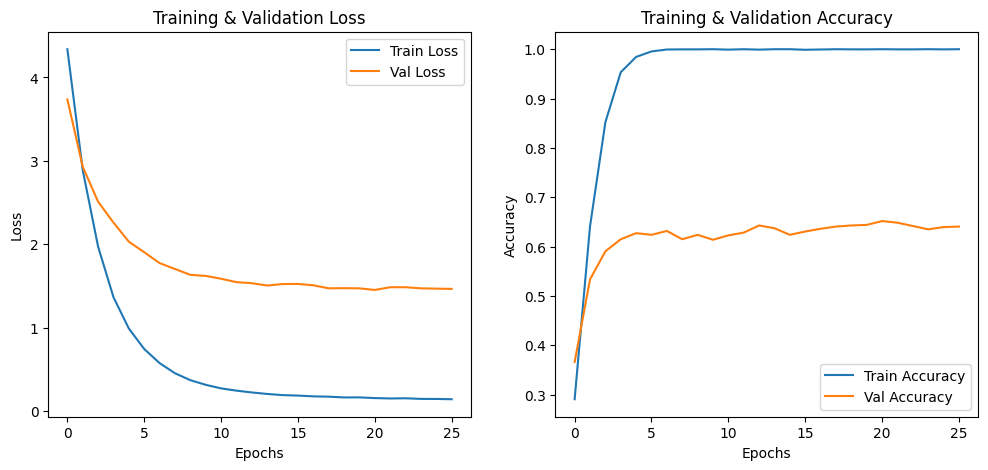

In [19]:
#### plotting training & validation loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

In [20]:
# # evaluating performance on test dataset

preds = model.predict(test_dataset, verbose="auto", steps=None, callbacks=None)

pred_class = np.argmax(preds, axis=1)

# print(pred_class[0:10])

# getting label -> integer label mapping from training data

class_names = train_ds.class_names  # Get class names in order
label_mapping = {idx: name for idx, name in enumerate(class_names)}  # Map name to index
# print("labels: ", label_mapping)
# now creating CSV with <hash>, <string label>
file_paths = test_dataset.file_paths
filenames = [os.path.splitext(os.path.basename(fp))[0] for fp in file_paths]
# print(filenames[0:10])
results = []

for i in range(len(filenames)):
    results.append({"md5hash": filenames[i], "label": label_mapping[pred_class[i]]})

results = pd.DataFrame(results)

print(results.head)

results.to_csv('submission.csv', index=False)  

39/39 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step
<bound method NDFrame.head of                                md5hash                    label
0     000e8dd5ee75dd6668e978e7a4e6fe54             folliculitis
1     0097275da3cb707415d13d2c59cf8c8c        mycosis-fungoides
2     009c75339a21bb84a6425be6a95938d6        mycosis-fungoides
3     016abe4884715af85cd3f309f93b9641  squamous-cell-carcinoma
4     018504389f4fa566232eb6e3ff838cb8  squamous-cell-carcinoma
...                                ...                      ...
1222  fe0d0f2a52c0dd67cdeef523867e4a0b  squamous-cell-carcinoma
1223  feb23b8d752fc437b2dc3c9816c647ac          dermatomyositis
1224  fedcb4729515d8c9a11d2dbe88576773          epidermal-nevus
1225  ff02c1d8ed5d771bd450877d2d1658ce          dermatomyositis
1226  ffd2a9f7fe88af2fc987ddb7a06c9069           kaposi-sarcoma

[1227 rows x 2 columns]>


## DO NOT USE -- Second model version with manual image conversion

In [21]:
# # preprocessing

# """
# Steps here:
# - iterate through all images in all of the directories of train
# - convert them to an array and add it to a dataframe with the ID being the hashcode
# - add this column to the original dataframe, matched by ID

# --> current version reduces image size significantly, which i think is fine for now
# --> i think maybe it's best to try the original model but with this dataset? alternatively choosing maybe relu instaed 
# of sigmoid in final step to choose exactly one label? or just choose the one with the highest prob from sigmoid

# --> SHAPE ON MODEL.FIT MIGHT NOT BE RIGHT BC EXPECTING ONE_HOT ENCODED LABELS 
# """

# width = 180
# height = 180
# X = []
# X_filenames = []

# # (folder name, list of directories, list of files)

# dircs = [i for i in os.walk(train_dir)]
# # print(dircs)
# for i in range(1, len(dircs)):
#     folder_path = dircs[i][0]
#     for j in range(len(dircs[i][2])):
#         path = folder_path + "/" + dircs[i][2][j]; # Construct the file path for the current image using the `Id` column from the DataFrame.
#         # print(path)
#         img = image.load_img(path, target_size=(width, height, 3))
#         # Load the image file from the constructed path.
#         # Resize the image to the target dimensions (180x180) with 3 channels (RGB).
        
#         img = image.img_to_array(img)
#         # Convert the loaded image into a NumPy array for numerical processing.
        
#         img = img / 255.0
#         # Normalize the pixel values to the range [0, 1] by dividing by 255.0.
#         # This is a common preprocessing step for deep learning models to improve training stability.
        
#         X.append(img)
#         X_filenames.append(dircs[i][2][j])
        
#         # Append the processed image array to the list `X`.

        
# X = np.array(X)
# X_filenames = np.array(X_filenames)
# # Convert the list of processed images into a NumPy array.
# # This ensures the data is in a format suitable for input to a deep learning model.

In [22]:
# # building a dataset in the form (input, labels)

# # first column is second column of X
# # second column is train_df['labels'] but in the correct order

# # print(X_filenames[0:10])

# inputs = [] 

# for i in train_df['md5hash']:
#     idx = np.where(X_filenames == i) # getting the index of the correct image
#     # print("label: ", i, " and index: ", idx)
#     img = X[idx] # actual image array
#     inputs.append(img)

# inputs = np.array(inputs)

# # create a tf.data.Dataset to feet into model.fit()
# X_train,X_test,y_train,y_test=train_test_split(inputs, train_df['label'],test_size=0.2)
# train_data = tf_data.Dataset.from_tensor_slices((X_train, y_train))
# val_data = tf_data.Dataset.from_tensor_slices((X_test, y_test))

In [23]:
# # building model

# # Initialize a Sequential model, which allows layers to be added one after another.
# model = Sequential()

# # Add an Input layer, specifying the shape of a single training example (e.g., an image).
# # model.add(keras.Input(shape=X_train[0].shape))
# inp_shape = image_size + (3,)
# model.add(keras.Input(shape=inp_shape))

# # Add the first convolutional layer with 16 filters, a 3x3 kernel, and ReLU activation.
# model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
# # This layer detects basic features like edges and corners in the input image.

# # Add a Batch Normalization layer to normalize the output of the Conv2D layer.
# model.add(BatchNormalization())
# # This stabilizes and accelerates training by reducing internal covariate shift.

# # Add a MaxPooling layer to reduce spatial dimensions by taking the maximum value in 2x2 regions.
# model.add(MaxPool2D(2, 2))
# # This reduces computational complexity and focuses on the most prominent features.

# # Add a Dropout layer to randomly drop 30% of neurons during training.
# model.add(Dropout(0.3))
# # This helps prevent overfitting by reducing reliance on specific neurons.

# # Add the second convolutional block (Conv2D -> BatchNormalization -> MaxPooling -> Dropout).
# model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
# # Increase the number of filters to 32 for detecting more complex features.
# model.add(BatchNormalization())
# model.add(MaxPool2D(2, 2))
# model.add(Dropout(0.3))

# # Add the third convolutional block with 64 filters.
# model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# # Further increases the number of filters to detect even more complex patterns.
# model.add(BatchNormalization())
# model.add(MaxPool2D(2, 2))
# model.add(Dropout(0.4))  # Increase dropout rate to 40% to further reduce overfitting risk.

# # Flatten the output of the previous layer to convert the 3D feature maps into a 1D vector.
# model.add(Flatten())
# # This prepares the data for input into dense (fully connected) layers.

# # Add a Dense (fully connected) layer with 128 neurons and ReLU activation.
# model.add(Dense(128, activation='relu'))
# # This layer learns high-level combinations of the features extracted by the Conv2D layers.
# model.add(BatchNormalization())  # Normalize the output to stabilize training.
# model.add(Dropout(0.5))  # Apply a 50% dropout rate for strong regularization.

# # Add the final Dense layer with 25 neurons and sigmoid activation.
# model.add(Dense(25, activation='sigmoid'))
# # The output layer has 25 neurons, each representing a class in a multi-label classification problem.
# # Sigmoid activation is used to output probabilities for each class, as multiple classes can be "on."

# # The model is now ready to be compiled and trained.

In [24]:
# # for first version

# model.compile(optimizer='adam',loss= keras.losses.SparseCategoricalCrossentropy(
#         from_logits=True,
#         ignore_class=None,
#         reduction="sum_over_batch_size",
#         name="sparse_categorical_crossentropy",
#         dtype=None,
#     ),metrics=['accuracy'])

# history = model.fit(train_data,epochs=5,validation_data=val_data)

In [25]:
# score = model.evaluate(X_test, y_test, verbose = 0 )
# print("Test Score: ", score[0])
# print("Test accuracy: ", score[1])

## 4. Build the model


In [26]:
# TODO: You should implement the model architecture here.
# Feel free to explore different model types that best serve your purpose.

## 5. Train the Model


In [27]:
# TODO: Train your model here. 

## 6. Make Predictions on Test Data

In [28]:
# # 6. Make Predictions on Test Data
# # def preprocess_test_data(test_df, directory):
# """
# Template for loading and preprocessing test images.
# """
# # TODO: create a generator for the test set here.
# # test_datagen = ImageDataGenerator(rescale=1./255)
# # test_generator = test_datagen.flow_from_dataframe(
# #     .... ## set the test_generator here 
# # )
# # return test_generator


In [29]:
# # Load test data
# test_dir = '/kaggle/input/bttai-ajl-2025/test/test/'
# # test_generator = preprocess_test_data(test_df, test_dir)

## 7. Generate Predictions

In [30]:
# TODO
# Generate predictions based on the trained model
# Then, save the predictions into a CSV file for submission